 <center> <h1> ANALYSE PRÉDICTIVE </h1> <h2> Présentation et utilisation <h2> </center>

<center><img src=" "/></center>

# Table des matières

___

* [Qu'est ce que l'analyse prédictive ?](#1)
* [Quand l'utiliser ?](#2)
    * [Exemples](#2_1)
* [Comment l'utiliser ?](#3)
    * [Choisir son modèle](#3_1)
        * [Le modèle de régression linéaire](#s3_1_1)
        * [Le modèle de régression logistique](#3_1_2)
* [Mise en pratique](#4)
    * [Les prérequis](#section_4_1)
    * [Importation des données](#4_2)
    * [Choisir ses variables](#4_3)
    * [Jeu d'entraînement et jeu de test](#4_4)
* [Comment évaluer son modèle ?](#5)
    * [Matrice de confusion](#5_1)
    * [Sensibilité](#5_2)
    * [Spécificité](#5_3)

## Qu'est ce que l'analyse prédictive ? <a class="anchor" id="1"></a>

___

L'analyse prédictive est une méthode qui permet d'interpréter les données actuelles et anciennes, afin de **faire des prévisions sur les événements à venir**. Elle donne ainsi lieu à des probabilités, **ne devant pas être considérées comme des certitudes**.

Par exemple, [dans la partie "Qu'est ce qu'une donnée ?"](https://nbviewer.org/urls/gitlab.com/alexandrethurel/stage/-/raw/main/tutoriel_2_donnees.ipynb), à partir d'une base de données contenant quelques informations (poils, dents, nombre de pattes, etc...) sur des animaux, on essaye de deviner si, à partir des données connues sur l'animal, il peut être dangereux pour l'homme ou non.

Le but de ce notebook est de vous guider dans la réalisation d'une méthode Modélisation prédictive, sur un jeu de données concret.

## Quand l'utiliser ? <a class="anchor" id="2"></a>

___

On utilise la modélisation prédictive lorsque l'on a déjà des données sur **ce qui s'est passé** dans le passé mais que l'on veut les utiliser pour essayer de prédire **ce qui va se passer**.


### Exemple : <a class="anchor" id="2_1"></a>

Dans votre boîte mail, c'est la modélisation prédictive qui, en fonction des informations du mail (heure, objet, destinataire,  et surtout contenu du mail) définie un probabilité qu'un mail soit un spam. Si la probabilité est supérieur à un certain seuil, la mail sera envoyé dans vos spams. Tout cela est étudié à partir d'une précédente base de données contenant des spams et des non-spams.


![title]( 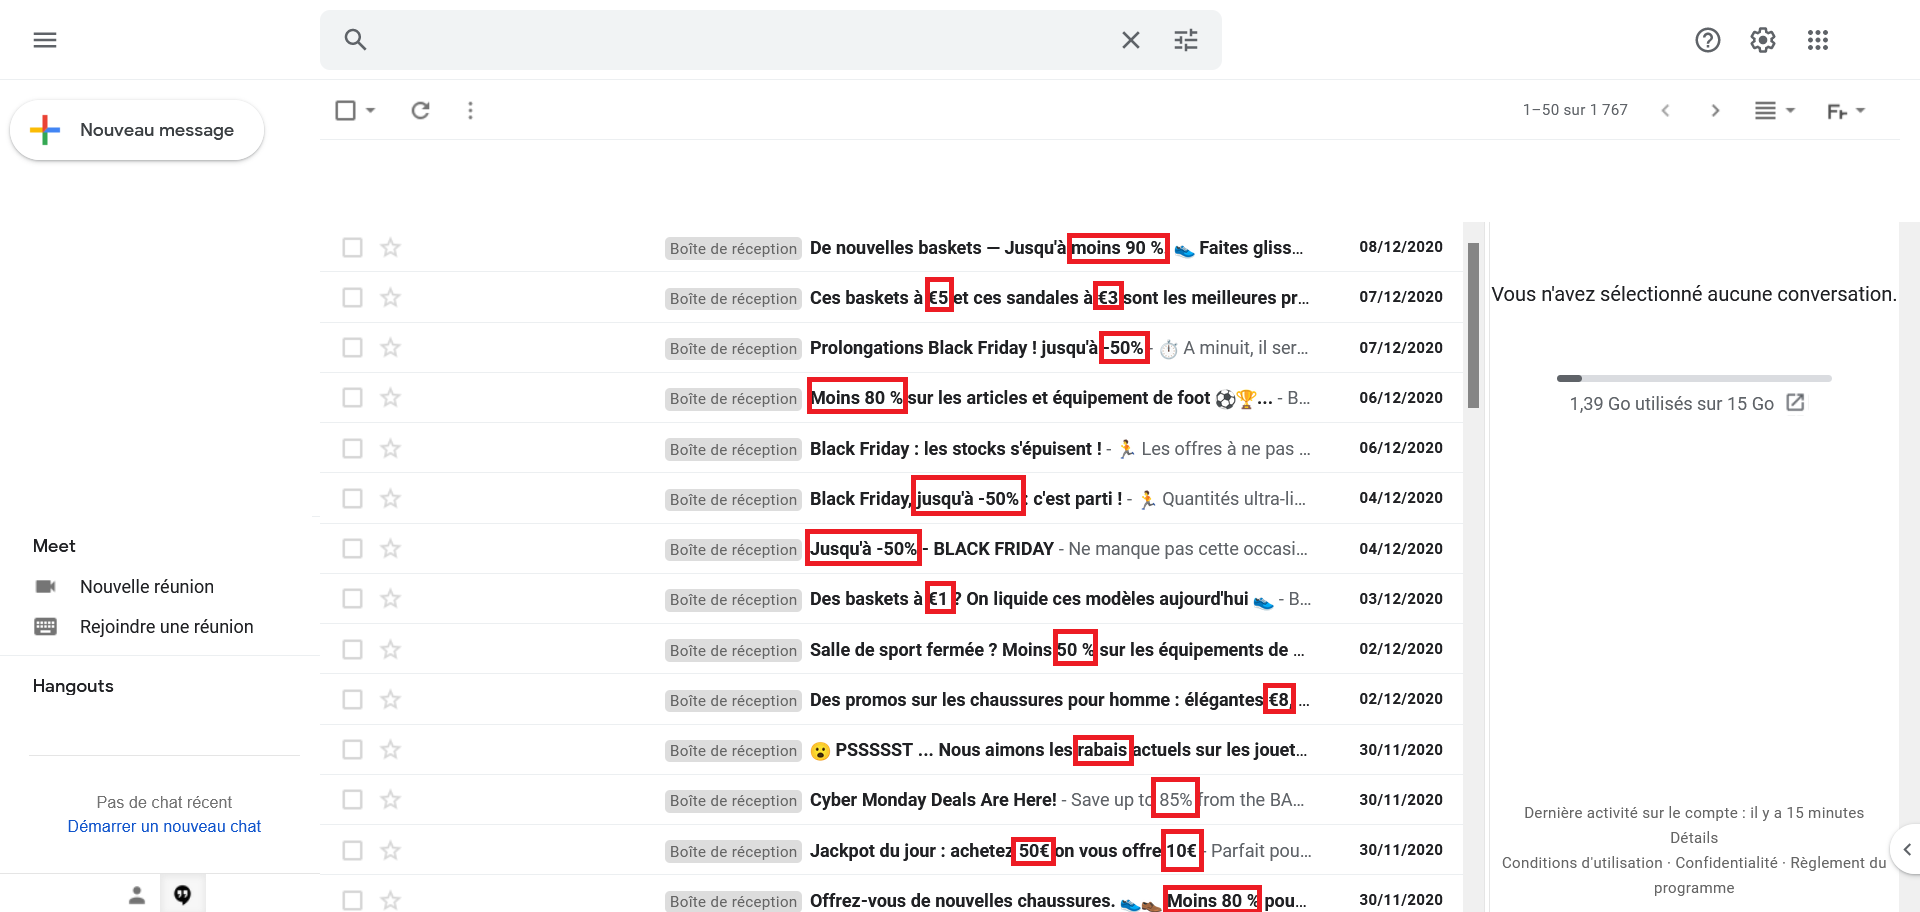)
<center> Figure 1 : spam dans une boite mail et éléments pouvant guider vers la reconnaissance de spams </center>

## Comment l'utiliser ? <a class="anchor" id="3"></a>

___

### Choisir son modèle <a class="anchor" id="3_1"></a>

Selon le type de la variable à prédire, on peut utiliser différents modèles. Seuls les 2 modèles les plus connus seront abordés, ce ne sont pas les seuls, vous pourrez retrouver une liste ici.

#### Le modèle de régression linéaire <a class="anchor" id="3_1_1"></a>

Si la variable que vous souhaitez prédire est quantitative (taille à l'age adulte d'un être vivant, prix d'un appartement, nombre de visites dans un magasin), on va utiliser un **modèle de régression linéaire**.

Imaginez avoir ces données sur les prix des albums de musique dans une médiathéque :

|album                  |auteur           |nombre_de_titres_album|prix_album_en_euros|
|-----------------------|-----------------|----------------------|-------------------|
|Sunshine Lover         |Julien Bronzé    |                     8|                 20|
|Ma cité a craqué       |Le petit ourson  |                     7|                 18|
|2x Papa                |Chevalier&PtiFlo |                     5|                 15|
|En moins de 2          |EnETHC           |                    13|                 30|
|All roads lead to Rome |Duo Lipo         |                    10|                 25|

Si on les place sur un graphique, on obtient ça : 

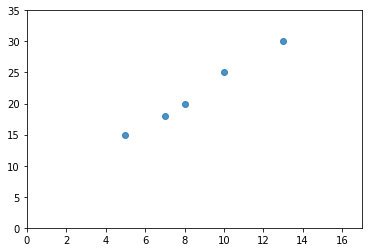

In [1]:
nombre_de_titres_album =  [8,7,5,13,10] 
prix_album_en_euros =  [20,18,15,30,25]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.regplot(x=nombre_de_titres_album, y=prix_album_en_euros, fit_reg=False)
ax.set_ylim(0,35)
ax.set_xlim(0,17)

plt.show()

On a très envie de tracer une droite entre les points, similaire à celle-ci :

![reg]( 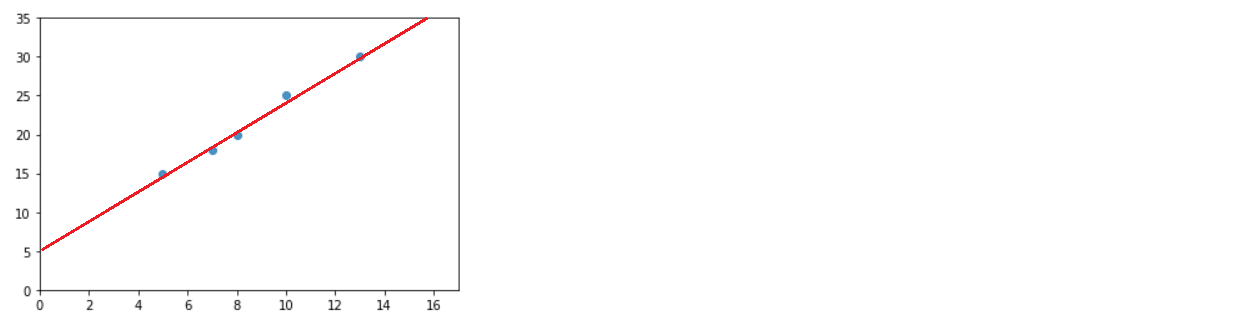)

Ici, on voit très vite que, sur notre droite, un album avec 12 titres vaudrait approximativement 28 euros. C'est le principe de la régression linéaire, qui va utiliser cette méthode de manière bien plus poussée, avec plus de variables.

![reg]( )

Cette méthode a des limites, car un album sans titre, ne pouvant pas exister, ne vaudrait pas 5€ ! On ne peut donc pas estimer des valeurs extrêmes par rapport aux données dont on dispose.

#### Le modèle de régression logistique <a class="anchor" id="3_1_2"></a>

Si la variable que vous souhaitez prédire est qualitative binaire (gagner/perdre, monter/descendre, oui/non), on va utiliser un **modèle de régression logistique**.

Dans ce cas, on va se baser sur **des probabilités**. Par exemple : la probabilité de gagner. Elles ne peuvent cependant pas être modélisées par une fonction affine, car **elle admet des valeurs négatives et/ou supérieures à l'unité**, ce qui n'est pas compatible avec la définition d'une probabilité (qui doit être entre 0 et 1). On va donc la représenter à l'aide de la fonction logistique, qui n'admet des valeurs qu'entre 0 et 1 :

<center><img src=" "/></center>

et va être représentée par cette courbe : 

<center><img src=" " ></center>

## Mise en pratique <a class="anchor" id="4"></a>

___

Pour la suite ce tutoriel, on étudiera des sms pour repérer lesquels d'entre eux sont des spam commerciaux et/ou arnaque, grâce à la régression logistique. Pour cela, on se base sur  **[ce fichier de données](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)**, contenant plus de 5000 sms divers (en anglais), déjà définis comme spams ou non-spams.


### Les prérequis <a class="anchor" id="4_1"></a>

In [ ]:
pip install Pandas

In [ ]:
pip install sklearn

In [ ]:
pip install numpy

### Importation des données <a class="anchor" id="4_2"></a>

On importe notre jeu de données issus de 

In [5]:
import pandas as pd

df = pd.read_csv('Data/spam.csv', encoding = "ISO-8859-1")
df.sample(5)

v1                                                 v2 Unnamed: 2  \
3827  ham  Where are you ? What are you doing ? Are yuou ...        NaN   
2173  ham  Hiya, had a good day? Have you spoken to since...        NaN   
2781  ham  Then its most likely called Mittelschmertz. Go...        NaN   
5275  ham                      Oh yeah clearly it's my fault        NaN   
4807  ham  What's up my own oga. Left my phone at home an...        NaN   

     Unnamed: 3 Unnamed: 4  
3827        NaN        NaN  
2173        NaN        NaN  
2781        NaN        NaN  
5275        NaN        NaN  
4807        NaN        NaN

On vérifie qu'il n'y a pas de valeurs manquantes.

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Les 3 dernières colonnes sont remplies de valeurs manquantes, on les supprime.

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

v1                                                 v2
959   ham                                            Where @
5417  ham           Nope. I just forgot. Will show next week
2599  ham  Gosh that , what a pain. Spose I better come t...
2221  ham  I notice you like looking in the shit mirror y...
4343  ham  Hi:)did you asked to waheeda fathima about leave?

On renomme les colonnes utiles.

In [8]:
df.rename(columns={'v1':'nature','v2':'texte'},inplace=True)
df.sample(5)

nature                                              texte
2659    ham                                              Ok...
3324    ham                       Nope... Juz off from work...
5562    ham  Ok lor... Sony ericsson salesman... I ask shuh...
1191    ham  Come to my home for one last time i wont do an...
4445    ham                    Merry christmas to u too annie!

On affecte à la nature (spam ou ham) les valeurs 0 et 1 afin d'établir une régression logisitique.

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['nature'] = encoder.fit_transform(df['nature'])
df.sample(5)

nature                                              texte
3099       0  Tessy..pls do me a favor. Pls convey my birthd...
2632       0                     I WILL CAL YOU SIR. In meeting
1729       0                 Lol yeah at this point I guess not
3539       0  I'll get there at 3, unless you guys want me t...
4565       0  Should i buy him a blackberry bold 2 or torch....

Le texte doit être mis en minuscule, dans le but de repérer des mots précis. Sans cela, si l'on veut repérer "free", on devrait indiquer "FREE","Free" et "free".

In [10]:
df['texte'] = df['texte'].str.lower()

### Choisir ses variables <a class="anchor" id="4_3"></a>

On va ensuite choisir les indicateurs pour repérer les spams. Ici, on va essayer de prédire si le mail reçu est un spam au travers de la présence de chiffres, du mot "free", du mot "offer", de la présence de "xx" et de "lol".

In [11]:
df['chiffre'] = df["texte"].str.count('[0-9]')
df['free'] = df["texte"].str.count("free")
df['offer'] = df["texte"].str.count("offer")
df['xx'] = df["texte"].str.count("xx")
df['interrogation'] = df["texte"].str.count("\\?")
df.sample(5)

nature                                              texte  chiffre  \
1197       0   he also knows about lunch menu only da. . i know        0   
4531       0  ok both our days. so what are you making for d...        0   
2198       0                     i'm in a movie. call me 4 wat?        1   
42         1  07732584351 - rodger burns - msg = we tried to...       22   
5327       0                      wishing you a wonderful week.        0   

      free  offer  xx  interrogation  
1197     0      0   0              0  
4531     0      0   0              2  
2198     0      0   0              1  
42       2      0   0              0  
5327     0      0   0              0

Le tableau ci-dessous va nous permettre de vérifier si toutes nos variables ont réellement un impact sur notre modèle. On va se repérer à la valeur présente dans la colonne "P>|z|", aussi appelée **p-value**, qui doit être inférieur à 5% (0.05) pour définir qu'une variable est réellement impactante.

In [12]:
from statsmodels.formula.api import logit

fit_logit = logit("nature ~ chiffre + free + offer + xx + interrogation ", df).fit()
print(fit_logit.summary())

Optimization terminated successfully.
         Current function value: 0.090300
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 nature   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5566
Method:                           MLE   Df Model:                            5
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.7708
Time:                        10:17:46   Log-Likelihood:                -503.15
converged:                       True   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.3463      0.128    -34.024      0.000      -4.597      -4.096
chiffre           0.

Comme vous pouvez le voir, la variable "interrogation" est égale à 0.109 soit 10%. On va donc considérer qu'elle n'est pas significative en présence des autres variables, on va la supprimer de notre modèle.

In [13]:
fit_logit = logit("nature ~ chiffre + free + offer + xx ", df).fit()
print(fit_logit.summary())

Optimization terminated successfully.
         Current function value: 0.090557
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 nature   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5567
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.7702
Time:                        10:17:46   Log-Likelihood:                -504.58
converged:                       True   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4108      0.124    -35.708      0.000      -4.653      -4.169
chiffre        0.6359      0.

Toutes les valeurs dans la colonne "P>|z|" sont inférieures à 5%, on peut donc utiliser ce modèle.

### Jeu d'entraînement et jeu de test <a class="anchor" id="4_4"></a>

Pour faire notre modélisation prédictive, on va devoir **entraîner notre modèle**. On va ensuite le tester sur des nouvelles données afin d'en établir le taux de bonnes réponses. Il est important de **créer un jeu de données spécialement pour essayer notre modèle**, car il est trop facile pour un modèle de reconnaître quelque chose qu'il connaît déjà. Imaginez faire une évaluation de Mathématiques avec exactement les mêmes exercices que dans le cours, ce serait bien plus facile !

Ne pouvant pas avoir des données en plus, on va donc créer un jeu de test et notre jeu d'entraînement directement à partir de nos données importées. Le jeu d'entraînement sera composé de 80% des données et le jeu de test des 20% autres. 

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 27)

On vérifie que les variables sont bien significatives en présences des autres, c'est-à-dire quand la valeur indiquée dans "P>|z|" est inférieure à 0,05.

In [15]:
fit_logit_train = logit("nature ~ chiffre + free + offer + xx", train).fit()
print(fit_logit_train.summary())

Optimization terminated successfully.
         Current function value: 0.090261
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 nature   No. Observations:                 4457
Model:                          Logit   Df Residuals:                     4452
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.7688
Time:                        10:17:46   Log-Likelihood:                -402.30
converged:                       True   LL-Null:                       -1740.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3950      0.137    -32.100      0.000      -4.663      -4.127
chiffre        0.6208      0.

On va ensuite appliquer notre modèle sur notre jeu de test et définir qu'un SPAM sera considéré comme SPAM si la probabilité définie par notre modèle que le mail soit SPAM est supérieure à 50%, cela peut paraître logique, mais il existe des différences subtiles qu'on ne détaillera pas ici.

In [16]:
train_pred = fit_logit_train.predict(test)

In [17]:
import numpy as np

def convert_prob_to_label(prob, cutoff = 0.5):
    label = None
    if prob > cutoff:
        label = 1
    else:
        label = 0
    return label

pred_labels = list(map(convert_prob_to_label, train_pred))
pred_labels = np.asarray(pred_labels)

## Comment évaluer son modèle ? <a class="anchor" id="5"></a>

___

<h3> Matrice de confusion </h3> <a class="anchor" id="5_1"></a>

Une **matrice de confusion** permet de vérifier comment ont été prédit nos messages. 

In [18]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test.nature, pred_labels)

print("               ","SPAM | HAM")
print("Considéré SPAM"," ",conf_matrix[[0],[0]].flat[0]," ",conf_matrix[[0],[1]].flat[0],'\n',"Considéré HAM"," ",conf_matrix[[1],[0]].flat[0]," ",conf_matrix[[1],[1]].flat[0])


                SPAM | HAM
Considéré SPAM   949   8 
 Considéré HAM   26   132


Sur la matrice de confusion, les bonnes réponses sont les spams considérés comme SPAM et les hams considérés comme HAM, c'est-à-dire la diagonale qui part d'en haut à gauche. Notre taux de bonne réponse est donc la somme des diagonales (949 + 132) divisée par l'ensemble des réponses (949 + 132 + 8 + 26), c'est-à-dire :

In [19]:
bonne_rep = (conf_matrix[[0],[0]].flat[0] + conf_matrix[[1],[1]].flat[0])/len(test)

print("Pourcentage de bonnes réponses :", round(bonne_rep*100,3) , "%")
print("Pourcentage d'erreur :", round(100-bonne_rep*100,3) , "%")

Pourcentage de bonnes réponses : 96.951 %
Pourcentage d'erreur : 3.049 %


Il est important d'afficher le taux d'erreur. Imaginez un indicateur 1 à 98% de bonnes réponses et un indicateur 2 à 94% : les résultats semblent proches, mais le taux d'erreur est 3 fois plus élevé pour l'indicateur 2 (6%), que pour l'indicateur 1 (2%). 

<h3> Sensibilité </h3> <a class="anchor" id="5_2"></a>

Un deuxième indicateur utilisable à partir de la matrice de confusion est la sensibilité, c'est-à-dire la capacité de notre modèle à définir les spams comme étant SPAM. Au tribunal, cela reviendrait à la capacité de repérer qu'un coupable est bien un coupable, pour ne pas mettre un innocent en prison. Il se calcule en divisant le nombre de spams considérés HAM par le nombre de spams totaux.

In [20]:
faux_negatifs = (conf_matrix[[1],[0]].flat[0])/(conf_matrix[[0],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])

print("Sensibilité :", round(100-faux_negatifs*100,3) , "%")
print("Pourcentage de faux négatifs :", round(faux_negatifs*100,3) , "%")

Sensibilité : 97.283 %
Pourcentage de faux négatifs : 2.717 %


<h3> Spécificité </h3> <a class="anchor" id="5_3"></a>

Un troisième indicateur utilisable à partir de la matrice de confusion est la spécificité, c'est-à-dire la capacité de notre modèle à définir ce qui n'est pas un spam comme quelque chose qui n'est pas SPAM (soit HAM, ici). Au tribunal, cela reviendrait à la capacité de repérer qu'un innocent est bien un innocent, pour ne pas relâcher un coupable. Il se calcule en divisant le nombre de hams considérés SPAM par le nombre de hams totaux.

In [21]:
faux_positifs = (conf_matrix[[0],[1]].flat[0])/(conf_matrix[[1],[0]].flat[0] + conf_matrix[[1],[1]].flat[0])

print("Spécificité :", round(100-faux_positifs*100,3) , "%")
print("Pourcentage de faux positifs :", round(faux_positifs*100,3) , "%")

Spécificité : 94.937 %
Pourcentage de faux positifs : 5.063 %


Pour un même taux de bonne réponse, l'augmentation du taux d'un des deux autres indicateurs va  amener à la réduction de l'autre. La préférence entre sensibilité et spécificité va surtout dépendre du cas dans lequel vous vous trouvez, par exemple : 

- pour un test COVID, on préfère dire à un patient négatif qu'il est positif, plutôt que de dire à un patient infecté qu'il est négatif et qu'il propage le virus sans le savoir. On va donc préférer augmenter la spécificité.


- pour un contrôle qualité de produits industriels, on préfère définir un lot de produit de bonne qualité en lot de mauvaise qualité, quitte à le jeter pour rien, que de définir un lot de mauvaise qualité comme de bonne qualité, et envoyer un mauvais lot au client. On va donc préférer augmenter la sensibilité.